## Lista 1

### Importowane biblioteki

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as sm

### Zadanie 1

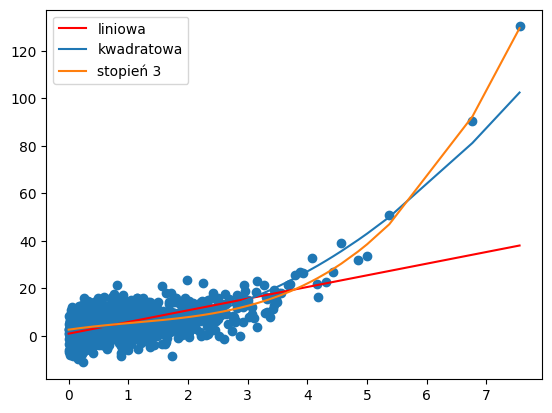

In [3]:
data = np.loadtxt('lista1_dane/zadanie1.txt')
x = []
y = []
for i in range(len(data)):
    x.append(data[i][0])
    y.append(data[i][1])

y_1 = np.polyval(np.polyfit(x,y,1),sorted(x))
y_2 = np.polyval(np.polyfit(x,y,2),sorted(x))
y_3 = np.polyval(np.polyfit(x,y,3),sorted(x))

plt.scatter(x, y)
plt.plot(sorted(x),y_1,color='red',label='liniowa')
plt.plot(sorted(x),y_2, label='kwadratowa')
plt.plot(sorted(x),y_3, label='stopień 3')
plt.legend()
plt.show()

1000


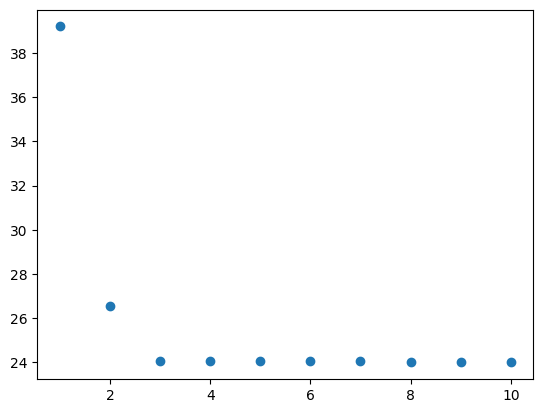

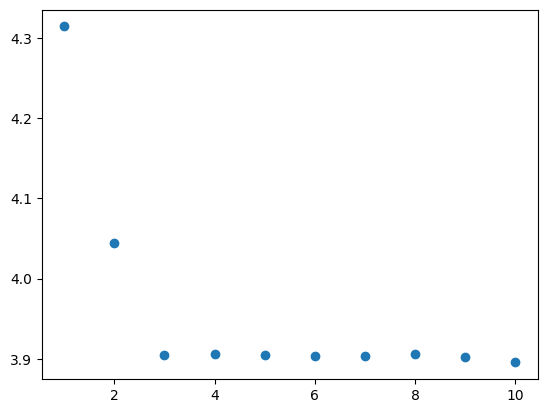

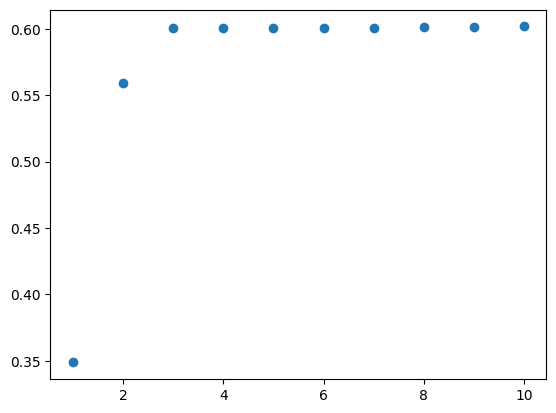

<Figure size 640x480 with 0 Axes>

In [4]:
mses=[]
ds=[]
rs=[]
n=len(data)
print(n)
for i in range(1,11):
    y_hat=(np.polyval(np.polyfit(x,y,i),x))
    mses.append(sm.mean_squared_error(y,y_hat))
    ds.append(sm.mean_absolute_error(y, y_hat))
    rs.append(sm.r2_score(y, y_hat))

x_axis = np.arange(1,11)
plt.scatter(x_axis, mses)
plt.show()
plt.clf()
plt.scatter(x_axis, ds)
plt.show()
plt.clf()
plt.scatter(x_axis, rs)
plt.show()
plt.clf()

### Zadanie 2

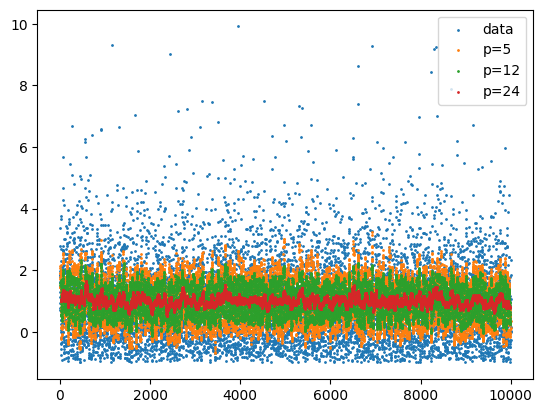

[6.0, 7.0, 5.0]


In [6]:
data = np.loadtxt('lista1_dane/zadanie2.txt')

def moving_average(x, p):
    ys = []
    for i in range(len(x)-2*p):
        val = 1/(2*p+1)*np.sum(x[i:i+2*p+1])
        ys.append(val)
    return ys

p=5
x_axis=np.arange(p,len(data)-p,1)
plt.scatter(np.arange(0,len(data),1),data,s=1, label='data')
plt.scatter(x_axis, moving_average(data,p),s=1, label='p=5')
p=12
x_axis=np.arange(p,len(data)-p,1)
plt.scatter(x_axis, moving_average(data,p),s=1, label='p=12')
p=24
x_axis=np.arange(p,len(data)-p,1)
plt.scatter(x_axis, moving_average(data,p),s=1, label='p=24')
plt.legend()
plt.show()
print(moving_average([3,8,7,6,2],1))

### Zadanie 3

5.226906171237193 19.966464658199964


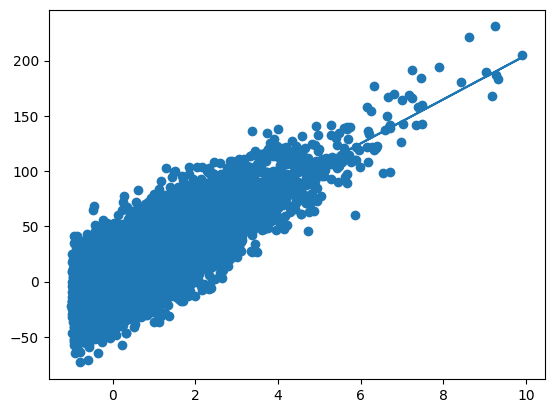

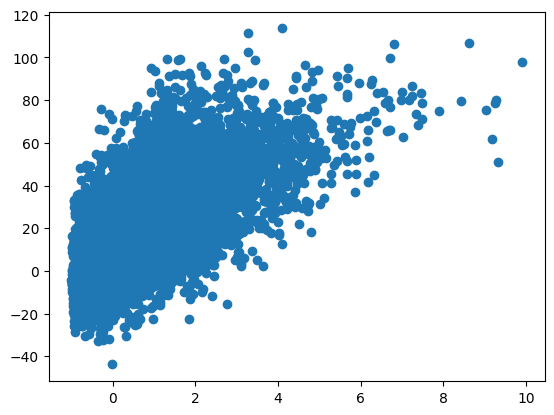

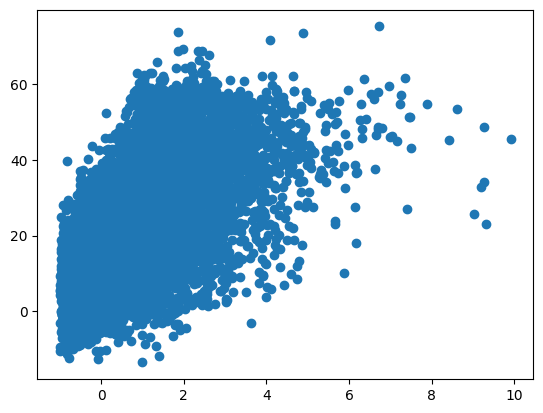

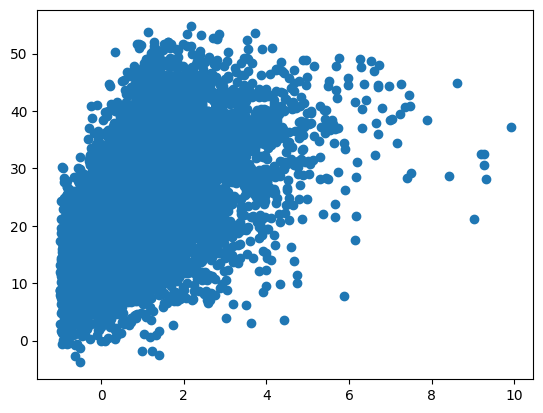

In [7]:
x = np.loadtxt('lista1_dane/zadanie2.txt')
y = np.loadtxt('lista1_dane/zadanie3.txt')


def moving_average(x, p):
    ys = []
    for i in range(len(x)-2*p):
        val = 1/(2*p+1)*np.sum(x[i:i+2*p+1])
        ys.append(val)
    return ys

y_mean = np.mean(y)
x_mean = np.mean(x)
beta1 = np.sum((x*(y-y_mean)))/np.sum((x-x_mean)**2)
beta0 = y_mean-beta1*x_mean

print(beta0, beta1)
plt.scatter(x,y)
plt.plot(x, beta0+beta1*x)
plt.show()
p=1
xs_3ma = x[p:len(x)-p]
ys_3ma = moving_average(y, 1)
plt.scatter(xs_3ma, ys_3ma)
plt.show()
p=5
xs_11ma = x[p:len(x)-p]
ys_11ma = moving_average(y, 5)
plt.scatter(xs_11ma, ys_11ma)
plt.show()
p=12
xs_25ma = x[p:len(x)-p]
ys_25ma = moving_average(y, 12)
plt.scatter(xs_25ma, ys_25ma)
plt.show()

### Zadanie 4

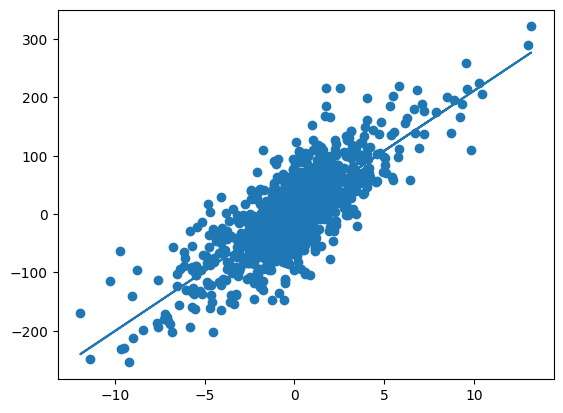

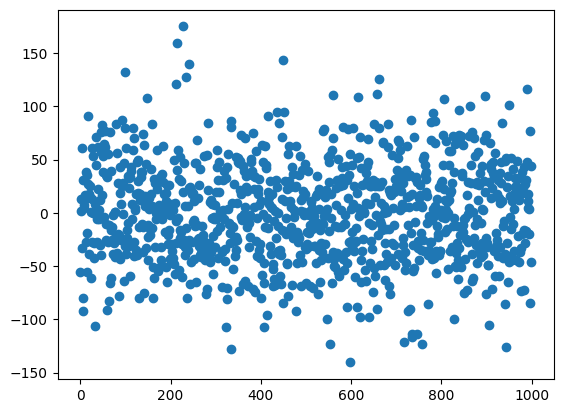

In [8]:
data = np.loadtxt('lista1_dane/zadanie4.txt')

x=[]
y=[]
for i in range(len(data)):
    x.append(data[i][0])
    y.append(data[i][1])

x = np.array(x)
y = np.array(y)
x_mean = np.mean(x)
y_mean = np.mean(y)
beta1 = np.sum((x*(y-y_mean)))/np.sum((x-x_mean)**2)
beta0 = y_mean-beta1*x_mean
y_hat = beta0 + beta1*x
plt.scatter(x,y)
plt.plot(x, y_hat)
plt.show()

e_i = y-y_hat
plt.scatter(np.arange(len(x)), e_i)
plt.show()




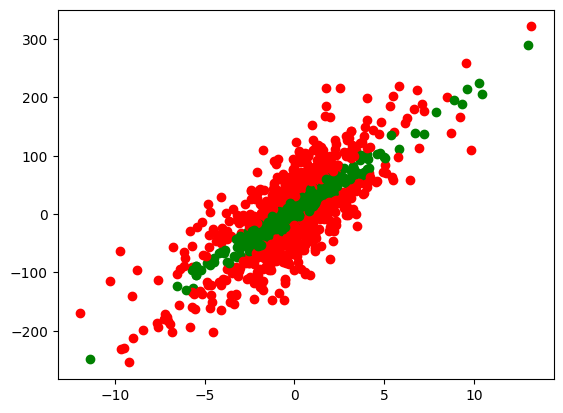

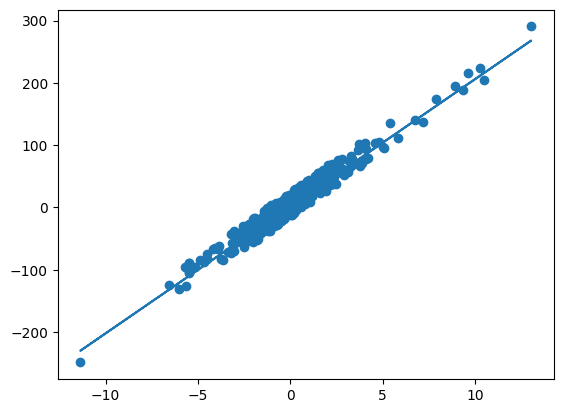

In [9]:
for i in range(len(x)):
    if np.abs(e_i[i])>20:
        plt.scatter(x[i],y[i],color='r')
    else:
        plt.scatter(x[i],y[i],color='g')

plt.show()

for i in range(len(x)):
    if np.abs(e_i[i])>20:
        x[i] = 0
        y[i] = 0

x_mean = np.mean(x)
y_mean = np.mean(y)
beta1 = np.sum((x*(y-y_mean)))/np.sum((x-x_mean)**2)
beta0 = y_mean-beta1*x_mean
y_hat = beta0 + beta1*x
plt.scatter(x,y)
plt.plot(x, y_hat)
plt.show()

### Zadanie 5

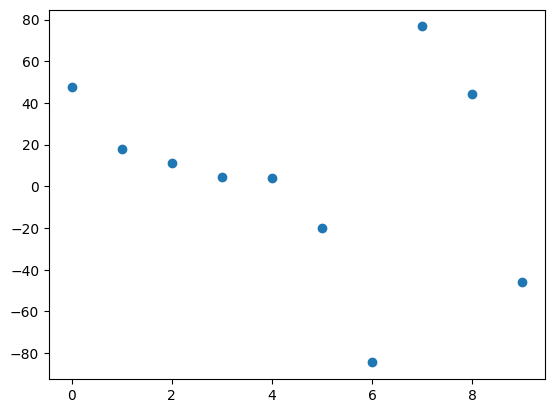

Dla treningu: MSE: 2094.2762537603803, MAE: 36.701512636191524, r2: 0.6187291455546721
Dla predykcji: MSE: 2026.2648183297729, MAE: 35.6890747778359, r2: 0.6773700100453328


(62804.60221985204, 62606.09072351246)

In [5]:
data = np.loadtxt('lista1_dane/zadanie4.txt')

x=[]
y=[]
for i in range(len(data)):
    x.append(data[i][0])
    y.append(data[i][1])

x = np.array(x)
y = np.array(y)
x1 = x[:990]
y1 = y[:990]
x_mean = np.mean(x1)
y_mean = np.mean(y1)
beta1 = np.sum((x1*(y1-y_mean)))/np.sum((x1-x_mean)**2)
beta0 = y_mean-beta1*x_mean
y_hat = beta0 + beta1*x1
x2 = x[990:]
y2 = beta0 + beta1*x2
e_i = y[990:] - y2
plt.scatter(np.arange(10), e_i)
plt.show()


mse_1 = sm.mean_squared_error(y1,y_hat)
mae_1 = sm.mean_absolute_error(y1, y_hat)
r2_1 = sm.r2_score(y1, y_hat)

mse_2 = sm.mean_squared_error(y[990:],y2)
mae_2 = sm.mean_absolute_error(y[990:],y2)
r2_2 = sm.r2_score(y[990:],y2)

print(f'Dla treningu: MSE: {mse_1}, MAE: {mae_1}, r2: {r2_1}')
print(f'Dla predykcji: MSE: {mse_2}, MAE: {mae_2}, r2: {r2_2}')

### Zadanie 6

1.1904809318009153 1.1869261103422122


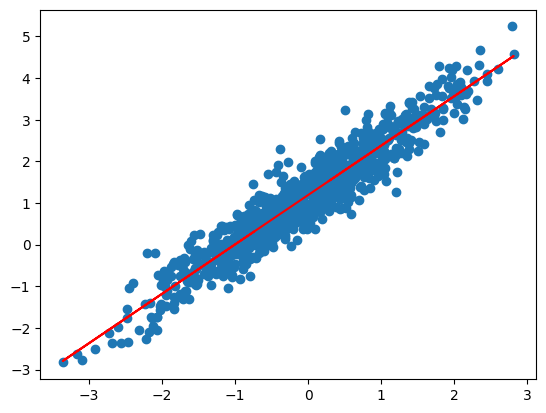

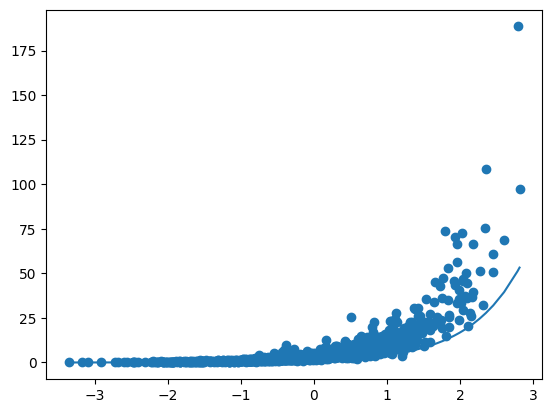

In [3]:
data = np.loadtxt('lista1_dane/zadanie6.txt')

x=[]
y=[]
for i in range(len(data)):
    x.append(data[i][0])
    y.append(data[i][1])

x = np.array(x)
y = np.array(y)
y_t = np.log(y)
x_mean = np.mean(x)
y_mean = np.mean(y_t)
beta1 = np.sum((x*(y_t-y_mean)))/np.sum((x-x_mean)**2)
beta0 = y_mean-beta1*x_mean
y_hat = beta0 + beta1*x
print(beta0, beta1)
plt.scatter(x, y_t)
plt.plot(x, y_hat, color='r')
plt.show()

y2 = np.exp(beta0*beta1*x)

plt.scatter(x,y)
plt.plot(sorted(x),sorted(y2))
plt.show()